In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

The following function creates one dimensional linear data and add a gaussian noise i.e $y = a \times x + \varepsilon$

In [11]:
def generate_data(n, a, variance):
    X = np.random.normal(size=(n,))
    y = X * a + np.sqrt(variance) * np.random.normal(size=(n,))
    return X.reshape((-1,1)), y

We generate and plot some arbitrary randomized data $(X,Y)$ along the noiseless function $y=ax$.

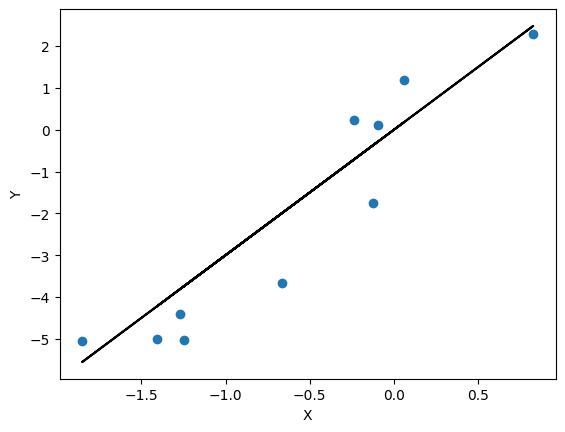

In [12]:
a = 3; n = 10; 
X, y = generate_data(n, a, 0.5)

plt.scatter(X, y)
plt.xlabel('X'); plt.ylabel('Y')
plt.plot(X,a*X, c='k')
plt.show()

Next we want to compute the least-square regression using closed form. We use this function on the training data generated above.

In [13]:
def linear_regression(X, y):
    """
    arguments:
        - X : input data matrix
        - y : output
    returns:
        - w : the least square estimator
    """
    lambda_ = 1.0
    X = np.concatenate((X, np.ones((len(X), 1))), axis=1) # Add column for bias
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

Text(0, 0.5, 'y')

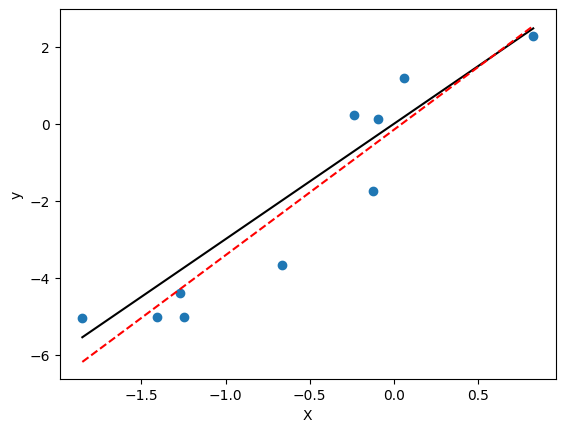

In [14]:
# Print the predicted weights (coefficient + bias)

w = linear_regression(X, y)
w

# Plot the training points and the predictor evaluated on a set of test points

X_test = np.linspace(np.min(X), np.max(X), 10)
y_test_pred = w[0] * X_test + w[1]

plt.scatter(X, y)
plt.plot(X_test, a * X_test, 'k')
plt.plot(X_test, y_test_pred, 'r--')
plt.xlabel('X')
plt.ylabel('y')

We can do the same Linear Regression with Scikit-learn, the module [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). To see how it works, we compare both coefficients.

In [15]:
scikit_LR = LinearRegression() # ordinary least squares regression
scikit_LR.fit(X, y)
print("sklearn: ", scikit_LR.coef_, scikit_LR.intercept_)
print("ordinary", w)

sklearn:  [3.26349082] -0.15372735714282748
ordinary [ 3.26349082 -0.15372736]


It is apparent that we get the same results, which is good.

## Polynomial regression, under & overfitting

To demonstrate polynomial regression, we will generate noiseless points $x_1, \dots, x_n$ with a few samples, and then the polynomial $y_i = x_i^2$. We can fit polynomials of varying degrees $d$ on the training data by utilizing [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from sklearn